#Uploading all the necessary libraries

In [1]:
# For implementing Bag of words
from sklearn.feature_extraction.text import CountVectorizer
# For implementing Linear Regression
from sklearn.linear_model import LinearRegression
# For implementing Support Vector Regression
from sklearn.svm import SVR
# For implementing Linear SVR
from sklearn.svm import LinearSVR

# For implementing CART
from sklearn.tree import DecisionTreeRegressor
# R2 Score
from sklearn.metrics import r2_score
# MAE Score
from sklearn.metrics import mean_absolute_error
# To convert string list into List object
from ast import literal_eval

import pandas as pd
import json
import numpy as np
import random as rnd
import time
import re

# For Scaling of preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


seed = 101

## Importing parsed dataset with additionally parced authors h-indexes

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


In [4]:
%cd /content/drive/My Drive/Thesisdatasets
df_cd_12_hinx = pd.read_csv('df_cd_12_hinx.csv')

/content/drive/My Drive/Thesisdatasets


In [5]:
df_cd_12_hinx

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract_y,title_length,Unnamed: 0.1,Authors,Authors_list,num_authors,AuthorID,h_index
0,0,10.1039/c2np20005h,Synthetic approaches toward sesterterpenoids,2012,50,2650568,Sesterterpenoids account for many bioactive na...,44,0,"[{'authorId': '152441055', 'name': 'Daniel T. ...","[{'authorId': '152441055', 'name': 'Daniel T. ...",3,152441055,10
1,1,10.1039/c2np90033e,Hot off the press,2012,1,2650568,A personal selection of 32 recent papers is pr...,17,1,"[{'authorId': '29377157', 'name': 'R. Hill', '...","[{'authorId': '29377157', 'name': 'R. Hill', '...",2,29377157,31
2,2,10.1039/c1np00054c,Natural product DNA major groove binders,2012,91,2650568,Covering: 1980 to 2011. Major groove recogniti...,40,2,"[{'authorId': '32193911', 'name': 'Paris L. Ha...","[{'authorId': '32193911', 'name': 'Paris L. Ha...",2,32193911,4
3,3,10.1039/c2np20064c,Bioactive natural products from Lysobacter,2012,131,2650568,The gliding Gram-negative Lysobacter bacteria ...,42,3,"[{'authorId': '4943997', 'name': 'Yunxuan Xie'...","[{'authorId': '4943997', 'name': 'Yunxuan Xie'...",4,4943997,15
4,4,10.1039/c2np20074k,Natural sesquiterpenoids,2012,65,2650568,"This review covers the isolation, structural d...",24,4,"[{'authorId': '6858987', 'name': 'B. Fraga', '...","[{'authorId': '6858987', 'name': 'B. Fraga', '...",1,6858987,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,7047,10.1002/asia.201100722,Facile Access to Transition-Metal-Carbonyl Com...,2012,58,18614728,Three transition-metal-carbonyl complexes [V(L...,103,7047,"[{'authorId': '9788048', 'name': 'R. Azhakar',...","[{'authorId': '9788048', 'name': 'R. Azhakar',...",5,9788048,28
7048,7048,10.1002/asia.201100670,Nitrogen-Doped Carbon Nanotube-Based Bilayer T...,2012,39,18614728,Carbon nanotubes (CNTs) have been widely consi...,126,7048,"[{'authorId': '15995247', 'name': 'H. Tantang'...","[{'authorId': '15995247', 'name': 'H. Tantang'...",9,15995247,9
7049,7049,10.1002/asia.201100882,Biomimetic Graphene Surfaces with Superhydroph...,2012,73,18614728,Triggered by the fantastic functions and brigh...,69,7049,"[{'authorId': '120465815', 'name': 'Jian‐Nan W...","[{'authorId': '120465815', 'name': 'Jian‐Nan W...",7,120465815,19
7050,7050,10.1002/asia.201100710,Functionalization and Dispersion of Hexagonal ...,2012,90,18614728,A mixture of bulk hexagonal boron nitride (h-B...,109,7050,"[{'authorId': '12311158', 'name': 'A. S. Nazar...","[{'authorId': '12311158', 'name': 'A. S. Nazar...",8,12311158,12


## Uploading dataset from drive with aditionally parsed fiels of study

In [6]:
%cd /content/drive/My Drive/Thesisdatasets
df_cd_12_field = pd.read_csv('df_cd_12_field.csv')

/content/drive/My Drive/Thesisdatasets


In [7]:
df_cd_12_field

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract_y,title_length,Unnamed: 0.1,Authors,Authors_list,num_authors,AuthorID,fieldsOfStudy
0,0,10.1039/c2np20005h,Synthetic approaches toward sesterterpenoids,2012,50,2650568,Sesterterpenoids account for many bioactive na...,44,0,"[{'authorId': '152441055', 'name': 'Daniel T. ...","[{'authorId': '152441055', 'name': 'Daniel T. ...",3,152441055,"['Chemistry', 'Medicine']"
1,1,10.1039/c2np90033e,Hot off the press,2012,1,2650568,A personal selection of 32 recent papers is pr...,17,1,"[{'authorId': '29377157', 'name': 'R. Hill', '...","[{'authorId': '29377157', 'name': 'R. Hill', '...",2,29377157,['Medicine']
2,2,10.1039/c1np00054c,Natural product DNA major groove binders,2012,91,2650568,Covering: 1980 to 2011. Major groove recogniti...,40,2,"[{'authorId': '32193911', 'name': 'Paris L. Ha...","[{'authorId': '32193911', 'name': 'Paris L. Ha...",2,32193911,"['Biology', 'Medicine']"
3,3,10.1039/c2np20064c,Bioactive natural products from Lysobacter,2012,131,2650568,The gliding Gram-negative Lysobacter bacteria ...,42,3,"[{'authorId': '4943997', 'name': 'Yunxuan Xie'...","[{'authorId': '4943997', 'name': 'Yunxuan Xie'...",4,4943997,"['Biology', 'Medicine']"
4,4,10.1039/c2np20074k,Natural sesquiterpenoids,2012,65,2650568,"This review covers the isolation, structural d...",24,4,"[{'authorId': '6858987', 'name': 'B. Fraga', '...","[{'authorId': '6858987', 'name': 'B. Fraga', '...",1,6858987,['Medicine']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,10.1002/asia.201100722,Facile Access to Transition-Metal-Carbonyl Com...,2012,58,18614728,Three transition-metal-carbonyl complexes [V(L...,103,7047,"[{'authorId': '9788048', 'name': 'R. Azhakar',...","[{'authorId': '9788048', 'name': 'R. Azhakar',...",5,9788048,"['Chemistry', 'Medicine']"
7039,7039,10.1002/asia.201100670,Nitrogen-Doped Carbon Nanotube-Based Bilayer T...,2012,39,18614728,Carbon nanotubes (CNTs) have been widely consi...,126,7048,"[{'authorId': '15995247', 'name': 'H. Tantang'...","[{'authorId': '15995247', 'name': 'H. Tantang'...",9,15995247,"['Chemistry', 'Medicine']"
7040,7040,10.1002/asia.201100882,Biomimetic Graphene Surfaces with Superhydroph...,2012,73,18614728,Triggered by the fantastic functions and brigh...,69,7049,"[{'authorId': '120465815', 'name': 'Jian‐Nan W...","[{'authorId': '120465815', 'name': 'Jian‐Nan W...",7,120465815,"['Chemistry', 'Medicine']"
7041,7041,10.1002/asia.201100710,Functionalization and Dispersion of Hexagonal ...,2012,90,18614728,A mixture of bulk hexagonal boron nitride (h-B...,109,7050,"[{'authorId': '12311158', 'name': 'A. S. Nazar...","[{'authorId': '12311158', 'name': 'A. S. Nazar...",8,12311158,"['Chemistry', 'Medicine']"


In [8]:
df_cd_12_field = df_cd_12_field[['DOI','fieldsOfStudy']]

In [9]:
df_cd_12_all= pd.merge(df_cd_12_hinx, df_cd_12_field, how='inner', on = 'DOI')

## The resulting merged data 

In [10]:
df_cd_12_all

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract_y,title_length,Unnamed: 0.1,Authors,Authors_list,num_authors,AuthorID,h_index,fieldsOfStudy
0,0,10.1039/c2np20005h,Synthetic approaches toward sesterterpenoids,2012,50,2650568,Sesterterpenoids account for many bioactive na...,44,0,"[{'authorId': '152441055', 'name': 'Daniel T. ...","[{'authorId': '152441055', 'name': 'Daniel T. ...",3,152441055,10,"['Chemistry', 'Medicine']"
1,1,10.1039/c2np90033e,Hot off the press,2012,1,2650568,A personal selection of 32 recent papers is pr...,17,1,"[{'authorId': '29377157', 'name': 'R. Hill', '...","[{'authorId': '29377157', 'name': 'R. Hill', '...",2,29377157,31,['Medicine']
2,2,10.1039/c1np00054c,Natural product DNA major groove binders,2012,91,2650568,Covering: 1980 to 2011. Major groove recogniti...,40,2,"[{'authorId': '32193911', 'name': 'Paris L. Ha...","[{'authorId': '32193911', 'name': 'Paris L. Ha...",2,32193911,4,"['Biology', 'Medicine']"
3,3,10.1039/c2np20064c,Bioactive natural products from Lysobacter,2012,131,2650568,The gliding Gram-negative Lysobacter bacteria ...,42,3,"[{'authorId': '4943997', 'name': 'Yunxuan Xie'...","[{'authorId': '4943997', 'name': 'Yunxuan Xie'...",4,4943997,15,"['Biology', 'Medicine']"
4,4,10.1039/c2np20074k,Natural sesquiterpenoids,2012,65,2650568,"This review covers the isolation, structural d...",24,4,"[{'authorId': '6858987', 'name': 'B. Fraga', '...","[{'authorId': '6858987', 'name': 'B. Fraga', '...",1,6858987,25,['Medicine']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7047,10.1002/asia.201100722,Facile Access to Transition-Metal-Carbonyl Com...,2012,58,18614728,Three transition-metal-carbonyl complexes [V(L...,103,7047,"[{'authorId': '9788048', 'name': 'R. Azhakar',...","[{'authorId': '9788048', 'name': 'R. Azhakar',...",5,9788048,28,"['Chemistry', 'Medicine']"
7039,7048,10.1002/asia.201100670,Nitrogen-Doped Carbon Nanotube-Based Bilayer T...,2012,39,18614728,Carbon nanotubes (CNTs) have been widely consi...,126,7048,"[{'authorId': '15995247', 'name': 'H. Tantang'...","[{'authorId': '15995247', 'name': 'H. Tantang'...",9,15995247,9,"['Chemistry', 'Medicine']"
7040,7049,10.1002/asia.201100882,Biomimetic Graphene Surfaces with Superhydroph...,2012,73,18614728,Triggered by the fantastic functions and brigh...,69,7049,"[{'authorId': '120465815', 'name': 'Jian‐Nan W...","[{'authorId': '120465815', 'name': 'Jian‐Nan W...",7,120465815,19,"['Chemistry', 'Medicine']"
7041,7050,10.1002/asia.201100710,Functionalization and Dispersion of Hexagonal ...,2012,90,18614728,A mixture of bulk hexagonal boron nitride (h-B...,109,7050,"[{'authorId': '12311158', 'name': 'A. S. Nazar...","[{'authorId': '12311158', 'name': 'A. S. Nazar...",8,12311158,12,"['Chemistry', 'Medicine']"


In [11]:
df_cd_12_all[['num_citiations','num_authors', 'title_length', 'h_index']]

,num_citiations,num_authors,title_length,h_index
0,50,3,44,10
1,1,2,17,31
2,91,2,40,4
3,131,4,42,15
4,65,1,24,25
...,...,...,...,...
7038,58,5,103,28
7039,39,9,126,9
7040,73,7,69,19
7041,90,8,109,12


# Preprocessing
Step 1: converting fieldOfstudy column into list

In [12]:
list_of_field = []
for i in range(len(df_cd_12_all)):

    list_of_field.append(eval(df_cd_12_all['fieldsOfStudy'][i]))

df_cd_12_all['field_list'] = list_of_field

In [13]:
df_cd_12_all['field_list']

0       [Chemistry, Medicine]
1                  [Medicine]
2         [Biology, Medicine]
3         [Biology, Medicine]
4                  [Medicine]
                ...          
7038    [Chemistry, Medicine]
7039    [Chemistry, Medicine]
7040    [Chemistry, Medicine]
7041    [Chemistry, Medicine]
7042    [Chemistry, Medicine]
Name: field_list, Length: 7043, dtype: object

In [14]:
import numpy as N

res = N.array(df_cd_12_all['field_list']) 
unique_res = N.unique(res) 
print("Unique elements of the list using numpy.unique():\n")
print(unique_res)

Unique elements of the list using numpy.unique():

[list(['Art', 'Materials Science']) list(['Biology'])
 list(['Biology', 'Chemistry']) list(['Biology', 'Medicine'])
 list(['Biology', 'Physics', 'Medicine']) list(['Business', 'Medicine'])
 list(['Chemistry']) list(['Chemistry', 'Biology'])
 list(['Chemistry', 'Biology', 'Medicine'])
 list(['Chemistry', 'Engineering'])
 list(['Chemistry', 'Materials Science'])
 list(['Chemistry', 'Mathematics']) list(['Chemistry', 'Medicine'])
 list(['Chemistry', 'Medicine', 'Biology'])
 list(['Chemistry', 'Medicine', 'Materials Science'])
 list(['Chemistry', 'Medicine', 'Materials Science', 'Physics'])
 list(['Chemistry', 'Physics']) list(['Computer Science'])
 list(['Computer Science', 'Medicine']) list(['Engineering'])
 list(['Engineering', 'Medicine']) list(['Environmental Science'])
 list(['Environmental Science', 'Medicine']) list(['Materials Science'])
 list(['Materials Science', 'Biology', 'Medicine'])
 list(['Materials Science', 'Chemistry'])


In [15]:
for i in range (len(df_cd_12_all['field_list'])):
    listToStr = ''
    listToStr = ' '.join([str(elem) for elem in df_cd_12_all['field_list'][i]])
    df_cd_12_all['field_list'][i] = listToStr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
df_cd_12_all['field_list'].unique()

array(['Chemistry Medicine', 'Medicine', 'Biology Medicine',
       'Medicine Biology', 'Business Medicine', 'Medicine Chemistry',
       'Chemistry', 'Materials Science', 'Physics Chemistry',
       'Chemistry Materials Science', 'Materials Science Physics',
       'Physics Mathematics Biology', 'Materials Science Chemistry',
       'Chemistry Medicine Materials Science Physics',
       'Materials Science Medicine', 'Physics', 'Chemistry Mathematics',
       'Physics Materials Science', 'Chemistry Biology',
       'Physics Biology', 'Chemistry Engineering',
       'Medicine Engineering Chemistry', 'Medicine Materials Science',
       'Computer Science Medicine',
       'Medicine Materials Science Physics Biology',
       'Physics Medicine Materials Science',
       'Chemistry Medicine Materials Science', 'Engineering',
       'Art Materials Science', 'Chemistry Physics', 'Political Science',
       'Biology', 'Chemistry Medicine Biology',
       'Chemistry Biology Medicine', 'Mathemat

In [17]:
unique_field_list = df_cd_12_all['field_list'].unique()

## Each unique comination of fields we are giving the number

In [18]:
unique_field_dict = { i : unique_field_list[i] for i in range(0, len(unique_field_list) ) }

In [19]:
unique_field_dict

{0: 'Chemistry Medicine',
 1: 'Medicine',
 2: 'Biology Medicine',
 3: 'Medicine Biology',
 4: 'Business Medicine',
 5: 'Medicine Chemistry',
 6: 'Chemistry',
 7: 'Materials Science',
 8: 'Physics Chemistry',
 9: 'Chemistry Materials Science',
 10: 'Materials Science Physics',
 11: 'Physics Mathematics Biology',
 12: 'Materials Science Chemistry',
 13: 'Chemistry Medicine Materials Science Physics',
 14: 'Materials Science Medicine',
 15: 'Physics',
 16: 'Chemistry Mathematics',
 17: 'Physics Materials Science',
 18: 'Chemistry Biology',
 19: 'Physics Biology',
 20: 'Chemistry Engineering',
 21: 'Medicine Engineering Chemistry',
 22: 'Medicine Materials Science',
 23: 'Computer Science Medicine',
 24: 'Medicine Materials Science Physics Biology',
 25: 'Physics Medicine Materials Science',
 26: 'Chemistry Medicine Materials Science',
 27: 'Engineering',
 28: 'Art Materials Science',
 29: 'Chemistry Physics',
 30: 'Political Science',
 31: 'Biology',
 32: 'Chemistry Medicine Biology',
 33

In [20]:
field_list = []
for i in range(len(df_cd_12_all['field_list'])):
  for j in range(len(unique_field_dict)):
      if df_cd_12_all['field_list'][i] == unique_field_dict[j]:
         field_list.append(j)
field_list[:7]

[0, 1, 2, 2, 1, 0, 2]

**Creating new column with fields in numerical format**

In [21]:
df_cd_12_all['fieldsOfStudy_num'] = field_list

In [22]:
df_cd_12_all

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract_y,title_length,Unnamed: 0.1,Authors,Authors_list,num_authors,AuthorID,h_index,fieldsOfStudy,field_list,fieldsOfStudy_num
0,0,10.1039/c2np20005h,Synthetic approaches toward sesterterpenoids,2012,50,2650568,Sesterterpenoids account for many bioactive na...,44,0,"[{'authorId': '152441055', 'name': 'Daniel T. ...","[{'authorId': '152441055', 'name': 'Daniel T. ...",3,152441055,10,"['Chemistry', 'Medicine']",Chemistry Medicine,0
1,1,10.1039/c2np90033e,Hot off the press,2012,1,2650568,A personal selection of 32 recent papers is pr...,17,1,"[{'authorId': '29377157', 'name': 'R. Hill', '...","[{'authorId': '29377157', 'name': 'R. Hill', '...",2,29377157,31,['Medicine'],Medicine,1
2,2,10.1039/c1np00054c,Natural product DNA major groove binders,2012,91,2650568,Covering: 1980 to 2011. Major groove recogniti...,40,2,"[{'authorId': '32193911', 'name': 'Paris L. Ha...","[{'authorId': '32193911', 'name': 'Paris L. Ha...",2,32193911,4,"['Biology', 'Medicine']",Biology Medicine,2
3,3,10.1039/c2np20064c,Bioactive natural products from Lysobacter,2012,131,2650568,The gliding Gram-negative Lysobacter bacteria ...,42,3,"[{'authorId': '4943997', 'name': 'Yunxuan Xie'...","[{'authorId': '4943997', 'name': 'Yunxuan Xie'...",4,4943997,15,"['Biology', 'Medicine']",Biology Medicine,2
4,4,10.1039/c2np20074k,Natural sesquiterpenoids,2012,65,2650568,"This review covers the isolation, structural d...",24,4,"[{'authorId': '6858987', 'name': 'B. Fraga', '...","[{'authorId': '6858987', 'name': 'B. Fraga', '...",1,6858987,25,['Medicine'],Medicine,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7047,10.1002/asia.201100722,Facile Access to Transition-Metal-Carbonyl Com...,2012,58,18614728,Three transition-metal-carbonyl complexes [V(L...,103,7047,"[{'authorId': '9788048', 'name': 'R. Azhakar',...","[{'authorId': '9788048', 'name': 'R. Azhakar',...",5,9788048,28,"['Chemistry', 'Medicine']",Chemistry Medicine,0
7039,7048,10.1002/asia.201100670,Nitrogen-Doped Carbon Nanotube-Based Bilayer T...,2012,39,18614728,Carbon nanotubes (CNTs) have been widely consi...,126,7048,"[{'authorId': '15995247', 'name': 'H. Tantang'...","[{'authorId': '15995247', 'name': 'H. Tantang'...",9,15995247,9,"['Chemistry', 'Medicine']",Chemistry Medicine,0
7040,7049,10.1002/asia.201100882,Biomimetic Graphene Surfaces with Superhydroph...,2012,73,18614728,Triggered by the fantastic functions and brigh...,69,7049,"[{'authorId': '120465815', 'name': 'Jian‐Nan W...","[{'authorId': '120465815', 'name': 'Jian‐Nan W...",7,120465815,19,"['Chemistry', 'Medicine']",Chemistry Medicine,0
7041,7050,10.1002/asia.201100710,Functionalization and Dispersion of Hexagonal ...,2012,90,18614728,A mixture of bulk hexagonal boron nitride (h-B...,109,7050,"[{'authorId': '12311158', 'name': 'A. S. Nazar...","[{'authorId': '12311158', 'name': 'A. S. Nazar...",8,12311158,12,"['Chemistry', 'Medicine']",Chemistry Medicine,0


In [23]:
df_cd_12_all['ISSN'] = df_cd_12_all['ISSN'].astype(int)

In [24]:
train_data_2 = df_cd_12_all

## Step 2: 
Merging training dataset with Scimagojr 2020, which contains features about journals

In [25]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [26]:
jouranls_chemistry = pd.read_csv('scimagojr 2020 (1).csv', sep=';',header=0)
jouranls_chemistry['row_num'] = np.arange(len(jouranls_chemistry))
jouranls_chemistry

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2020),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,row_num
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","62,937",Q1,168,47,119,...,15499,80,"126,34","73,45",United States,Northern America,Wiley-Blackwell,1950-2020,Hematology (Q1); Oncology (Q1),0
1,2,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","40,949",Q1,143,10,9,...,492,9,"50,00","129,20",United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2020,Epidemiology (Q1); Health Information Manageme...,1
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","37,461",Q1,431,115,338,...,10844,167,"32,83","73,38",United Kingdom,Western Europe,Nature Publishing Group,2000-2020,Cell Biology (Q1); Molecular Biology (Q1),2
3,4,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","34,573",Q1,259,40,110,...,1945,109,"16,00","68,33",United Kingdom,Western Europe,Oxford University Press,1886-2020,Economics and Econometrics (Q1),3
4,5,21100812243,Nature Reviews Materials,journal,20588437,"32,011",Q1,108,92,264,...,11188,138,"32,15","115,57",United Kingdom,Western Europe,Nature Publishing Group,2016-2020,"Biomaterials (Q1); Electronic, Optical and Mag...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32947,32948,25412,Zhonghua kou qiang yi xue za zhi = Zhonghua ko...,journal,10020098,NaN,-,14,150,0,...,0,0,"0,00","0,00",China,Asiatic Region,Zhonghua Yixuehui Zazhishe,"1987-2016, 2020",Medicine (miscellaneous),32947
32948,32949,21485,Zhonghua liu xing bing xue za zhi = Zhonghua l...,journal,02546450,NaN,-,31,292,0,...,0,0,"0,00","0,00",China,Asiatic Region,Zhonghua Yixuehui Zazhishe,"1982-2016, 2020",Medicine (miscellaneous),32948
32949,32950,26726,Zhonghua nei ke za zhi [Chinese journal of int...,journal,05781426,NaN,-,18,5,0,...,0,0,"0,00","0,00",China,Asiatic Region,Zhonghua Yixuehui Zazhishe,"1957-1959, 1979-1997, 1999-2016, 2020",Medicine (miscellaneous),32949
32950,32951,19324,Zhonghua wai ke za zhi [Chinese journal of sur...,journal,05295815,NaN,-,16,5,0,...,0,0,"0,00","0,00",China,Asiatic Region,Zhonghua Yixuehui Zazhishe,"1957, 1959-1964, 1979-2016, 2020",Medicine (miscellaneous),32950


In [27]:
journ_chem_org = jouranls_chemistry[jouranls_chemistry['Categories'].str.contains("Organic Chemistry")]
journ_chem_org = journ_chem_org[journ_chem_org['Issn'] != '-']
journ_chem_org

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2020),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,row_num
211,212,26465,Progress in Polymer Science,journal,00796700,"5,952",Q1,279,55,169,...,4645,169,"27,57","217,56",United Kingdom,Western Europe,Elsevier Ltd.,"1967, 1970-1971, 1975, 1977-1978, 1980-1986, 1...",Ceramics and Composites (Q1); Materials Chemis...,211
648,649,26968,Journal of Photochemistry and Photobiology C: ...,journal,13895567,"2,987",Q1,92,12,68,...,848,67,"11,72","223,50",Netherlands,Western Europe,Elsevier,2000-2020,Catalysis (Q1); Organic Chemistry (Q1); Physic...,648
772,773,26371,Natural Product Reports,journal,"02650568, 14604752","2,703",Q1,177,92,246,...,2233,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772
1246,1247,21100242403,Redox Biology,journal,22132317,"2,059",Q1,88,434,783,...,8400,770,"10,47","78,28",Netherlands,Western Europe,Elsevier BV,2013-2020,Biochemistry (Q1); Clinical Biochemistry (Q1);...,1246
1316,1317,21100779404,Macromolecules,journal,"00249297, 15205835","1,994",Q1,313,1070,2971,...,17662,2956,"5,48","57,47",United States,Northern America,American Chemical Society,1968-2020,Inorganic Chemistry (Q1); Materials Chemistry ...,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24266,24267,21100202726,Trends in Carbohydrate Research,journal,09750304,"0,140",Q4,7,24,70,...,22,70,"0,28","41,71",India,Asiatic Region,Association of Carbohydrate Chemists and Techn...,2009-2020,Organic Chemistry (Q4),24266
24804,24805,21100201730,Organophosphorus Chemistry,book series,"14651904, 03060713","0,135",Q4,7,9,19,...,11,17,"0,56","165,56",United Kingdom,Western Europe,Chemical Society,"2008, 2012, 2014-2018, 2020",Biochemistry (Q4); Organic Chemistry (Q4),24804
25663,25664,19800188074,Medicinal Plants - International Journal of Ph...,journal,"09754261, 09756892","0,128",Q4,10,74,163,...,37,162,"0,27","36,09",Netherlands,Western Europe,IOS Press,2010-2020,Drug Discovery (Q4); Organic Chemistry (Q4); P...,25663
26755,26756,24112,Indian Journal of Heterocyclic Chemistry,journal,09711627,"0,122",Q4,30,81,90,...,23,90,"0,32","28,20",India,Asiatic Region,Connect Journals,1996-2020,Biochemistry (Q4); Organic Chemistry (Q4),26755


In [28]:
comma = ","
for i in journ_chem_org['row_num']:
  for comma in  journ_chem_org['Issn'][i]:
     journ_chem_org['Issn'][i] = journ_chem_org['Issn'][i].split(',')[0]

journ_chem_org

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2020),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,row_num
211,212,26465,Progress in Polymer Science,journal,00796700,"5,952",Q1,279,55,169,...,4645,169,"27,57","217,56",United Kingdom,Western Europe,Elsevier Ltd.,"1967, 1970-1971, 1975, 1977-1978, 1980-1986, 1...",Ceramics and Composites (Q1); Materials Chemis...,211
648,649,26968,Journal of Photochemistry and Photobiology C: ...,journal,13895567,"2,987",Q1,92,12,68,...,848,67,"11,72","223,50",Netherlands,Western Europe,Elsevier,2000-2020,Catalysis (Q1); Organic Chemistry (Q1); Physic...,648
772,773,26371,Natural Product Reports,journal,02650568,"2,703",Q1,177,92,246,...,2233,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772
1246,1247,21100242403,Redox Biology,journal,22132317,"2,059",Q1,88,434,783,...,8400,770,"10,47","78,28",Netherlands,Western Europe,Elsevier BV,2013-2020,Biochemistry (Q1); Clinical Biochemistry (Q1);...,1246
1316,1317,21100779404,Macromolecules,journal,00249297,"1,994",Q1,313,1070,2971,...,17662,2956,"5,48","57,47",United States,Northern America,American Chemical Society,1968-2020,Inorganic Chemistry (Q1); Materials Chemistry ...,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24266,24267,21100202726,Trends in Carbohydrate Research,journal,09750304,"0,140",Q4,7,24,70,...,22,70,"0,28","41,71",India,Asiatic Region,Association of Carbohydrate Chemists and Techn...,2009-2020,Organic Chemistry (Q4),24266
24804,24805,21100201730,Organophosphorus Chemistry,book series,14651904,"0,135",Q4,7,9,19,...,11,17,"0,56","165,56",United Kingdom,Western Europe,Chemical Society,"2008, 2012, 2014-2018, 2020",Biochemistry (Q4); Organic Chemistry (Q4),24804
25663,25664,19800188074,Medicinal Plants - International Journal of Ph...,journal,09754261,"0,128",Q4,10,74,163,...,37,162,"0,27","36,09",Netherlands,Western Europe,IOS Press,2010-2020,Drug Discovery (Q4); Organic Chemistry (Q4); P...,25663
26755,26756,24112,Indian Journal of Heterocyclic Chemistry,journal,09711627,"0,122",Q4,30,81,90,...,23,90,"0,32","28,20",India,Asiatic Region,Connect Journals,1996-2020,Biochemistry (Q4); Organic Chemistry (Q4),26755


In [553]:
df_cd_12_all

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract_y,title_length,Unnamed: 0.1,Authors,Authors_list,num_authors,AuthorID,h_index,fieldsOfStudy,field_list,fieldsOfStudy_num
0,0,10.1039/c2np20005h,Synthetic approaches toward sesterterpenoids,2012,50,2650568,Sesterterpenoids account for many bioactive na...,44,0,"[{'authorId': '152441055', 'name': 'Daniel T. ...","[{'authorId': '152441055', 'name': 'Daniel T. ...",3,152441055,10,"['Chemistry', 'Medicine']",Chemistry Medicine,0
1,1,10.1039/c2np90033e,Hot off the press,2012,1,2650568,A personal selection of 32 recent papers is pr...,17,1,"[{'authorId': '29377157', 'name': 'R. Hill', '...","[{'authorId': '29377157', 'name': 'R. Hill', '...",2,29377157,31,['Medicine'],Medicine,1
2,2,10.1039/c1np00054c,Natural product DNA major groove binders,2012,91,2650568,Covering: 1980 to 2011. Major groove recogniti...,40,2,"[{'authorId': '32193911', 'name': 'Paris L. Ha...","[{'authorId': '32193911', 'name': 'Paris L. Ha...",2,32193911,4,"['Biology', 'Medicine']",Biology Medicine,2
3,3,10.1039/c2np20064c,Bioactive natural products from Lysobacter,2012,131,2650568,The gliding Gram-negative Lysobacter bacteria ...,42,3,"[{'authorId': '4943997', 'name': 'Yunxuan Xie'...","[{'authorId': '4943997', 'name': 'Yunxuan Xie'...",4,4943997,15,"['Biology', 'Medicine']",Biology Medicine,2
4,4,10.1039/c2np20074k,Natural sesquiterpenoids,2012,65,2650568,"This review covers the isolation, structural d...",24,4,"[{'authorId': '6858987', 'name': 'B. Fraga', '...","[{'authorId': '6858987', 'name': 'B. Fraga', '...",1,6858987,25,['Medicine'],Medicine,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7047,10.1002/asia.201100722,Facile Access to Transition-Metal-Carbonyl Com...,2012,58,18614728,Three transition-metal-carbonyl complexes [V(L...,103,7047,"[{'authorId': '9788048', 'name': 'R. Azhakar',...","[{'authorId': '9788048', 'name': 'R. Azhakar',...",5,9788048,28,"['Chemistry', 'Medicine']",Chemistry Medicine,0
7039,7048,10.1002/asia.201100670,Nitrogen-Doped Carbon Nanotube-Based Bilayer T...,2012,39,18614728,Carbon nanotubes (CNTs) have been widely consi...,126,7048,"[{'authorId': '15995247', 'name': 'H. Tantang'...","[{'authorId': '15995247', 'name': 'H. Tantang'...",9,15995247,9,"['Chemistry', 'Medicine']",Chemistry Medicine,0
7040,7049,10.1002/asia.201100882,Biomimetic Graphene Surfaces with Superhydroph...,2012,73,18614728,Triggered by the fantastic functions and brigh...,69,7049,"[{'authorId': '120465815', 'name': 'Jian‐Nan W...","[{'authorId': '120465815', 'name': 'Jian‐Nan W...",7,120465815,19,"['Chemistry', 'Medicine']",Chemistry Medicine,0
7041,7050,10.1002/asia.201100710,Functionalization and Dispersion of Hexagonal ...,2012,90,18614728,A mixture of bulk hexagonal boron nitride (h-B...,109,7050,"[{'authorId': '12311158', 'name': 'A. S. Nazar...","[{'authorId': '12311158', 'name': 'A. S. Nazar...",8,12311158,12,"['Chemistry', 'Medicine']",Chemistry Medicine,0


As we are joining tables by ISSN, let's convert this column from the training dataset into string format

In [29]:
k = 1
zero = '0'
ISSN_str = []
for i in range(len(df_cd_12_all['ISSN'])):
    if len(str(df_cd_12_all['ISSN'][i])) < 8:
      
        k = 8 - len(str(df_cd_12_all['ISSN'][i]))
        zero = k*'0'
       
        ISSN_str.append(zero + str(df_cd_12_all['ISSN'][i]))
    else: 
        ISSN_str.append(str(df_cd_12_all['ISSN'][i]))

df_cd_12_all['ISSN_str'] = ISSN_str
        
df_cd_12_all['ISSN_str']

0       02650568
1       02650568
2       02650568
3       02650568
4       02650568
          ...   
7038    18614728
7039    18614728
7040    18614728
7041    18614728
7042    18614728
Name: ISSN_str, Length: 7043, dtype: object

In [39]:
df_cd_12_all['Issn'] = df_cd_12_all['ISSN_str']
train_data_12 = pd.merge(df_cd_12_all, journ_chem_org, how='inner', on = 'Issn')

In [40]:
train_data_12 

,Unnamed: 0,DOI,Title_x,Year,num_citiations,ISSN,Abstract_y,title_length,Unnamed: 0.1,Authors,...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,row_num
0,0,10.1039/c2np20005h,Synthetic approaches toward sesterterpenoids,2012,50,2650568,Sesterterpenoids account for many bioactive na...,44,0,"[{'authorId': '152441055', 'name': 'Daniel T. ...",...,2233,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772
1,1,10.1039/c2np90033e,Hot off the press,2012,1,2650568,A personal selection of 32 recent papers is pr...,17,1,"[{'authorId': '29377157', 'name': 'R. Hill', '...",...,2233,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772
2,2,10.1039/c1np00054c,Natural product DNA major groove binders,2012,91,2650568,Covering: 1980 to 2011. Major groove recogniti...,40,2,"[{'authorId': '32193911', 'name': 'Paris L. Ha...",...,2233,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772
3,3,10.1039/c2np20064c,Bioactive natural products from Lysobacter,2012,131,2650568,The gliding Gram-negative Lysobacter bacteria ...,42,3,"[{'authorId': '4943997', 'name': 'Yunxuan Xie'...",...,2233,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772
4,4,10.1039/c2np20074k,Natural sesquiterpenoids,2012,65,2650568,"This review covers the isolation, structural d...",24,4,"[{'authorId': '6858987', 'name': 'B. Fraga', '...",...,2233,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7047,10.1002/asia.201100722,Facile Access to Transition-Metal-Carbonyl Com...,2012,58,18614728,Three transition-metal-carbonyl complexes [V(L...,103,7047,"[{'authorId': '9788048', 'name': 'R. Azhakar',...",...,6009,1485,"4,24","72,35",United Kingdom,Western Europe,John Wiley and Sons Ltd,2006-2020,Chemistry (miscellaneous) (Q1); Organic Chemis...,3392
7039,7048,10.1002/asia.201100670,Nitrogen-Doped Carbon Nanotube-Based Bilayer T...,2012,39,18614728,Carbon nanotubes (CNTs) have been widely consi...,126,7048,"[{'authorId': '15995247', 'name': 'H. Tantang'...",...,6009,1485,"4,24","72,35",United Kingdom,Western Europe,John Wiley and Sons Ltd,2006-2020,Chemistry (miscellaneous) (Q1); Organic Chemis...,3392
7040,7049,10.1002/asia.201100882,Biomimetic Graphene Surfaces with Superhydroph...,2012,73,18614728,Triggered by the fantastic functions and brigh...,69,7049,"[{'authorId': '120465815', 'name': 'Jian‐Nan W...",...,6009,1485,"4,24","72,35",United Kingdom,Western Europe,John Wiley and Sons Ltd,2006-2020,Chemistry (miscellaneous) (Q1); Organic Chemis...,3392
7041,7050,10.1002/asia.201100710,Functionalization and Dispersion of Hexagonal ...,2012,90,18614728,A mixture of bulk hexagonal boron nitride (h-B...,109,7050,"[{'authorId': '12311158', 'name': 'A. S. Nazar...",...,6009,1485,"4,24","72,35",United Kingdom,Western Europe,John Wiley and Sons Ltd,2006-2020,Chemistry (miscellaneous) (Q1); Organic Chemis...,3392


## Step 3:
Removing unnecessary string features

In [41]:
train_data_12 = train_data_12.drop(columns = ['Unnamed: 0', 'Title_x', 'Year', 'Abstract_y', 	'Region', 'Publisher', 'Categories', 'row_num', 'Issn' ])

In [42]:
train_data_12

,DOI,num_citiations,ISSN,title_length,Unnamed: 0.1,Authors,Authors_list,num_authors,AuthorID,h_index,...,H index,Total Docs. (2020),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Coverage
0,10.1039/c2np20005h,50,2650568,44,0,"[{'authorId': '152441055', 'name': 'Daniel T. ...","[{'authorId': '152441055', 'name': 'Daniel T. ...",3,152441055,10,...,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020
1,10.1039/c2np90033e,1,2650568,17,1,"[{'authorId': '29377157', 'name': 'R. Hill', '...","[{'authorId': '29377157', 'name': 'R. Hill', '...",2,29377157,31,...,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020
2,10.1039/c1np00054c,91,2650568,40,2,"[{'authorId': '32193911', 'name': 'Paris L. Ha...","[{'authorId': '32193911', 'name': 'Paris L. Ha...",2,32193911,4,...,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020
3,10.1039/c2np20064c,131,2650568,42,3,"[{'authorId': '4943997', 'name': 'Yunxuan Xie'...","[{'authorId': '4943997', 'name': 'Yunxuan Xie'...",4,4943997,15,...,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020
4,10.1039/c2np20074k,65,2650568,24,4,"[{'authorId': '6858987', 'name': 'B. Fraga', '...","[{'authorId': '6858987', 'name': 'B. Fraga', '...",1,6858987,25,...,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,10.1002/asia.201100722,58,18614728,103,7047,"[{'authorId': '9788048', 'name': 'R. Azhakar',...","[{'authorId': '9788048', 'name': 'R. Azhakar',...",5,9788048,28,...,106,496,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020
7039,10.1002/asia.201100670,39,18614728,126,7048,"[{'authorId': '15995247', 'name': 'H. Tantang'...","[{'authorId': '15995247', 'name': 'H. Tantang'...",9,15995247,9,...,106,496,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020
7040,10.1002/asia.201100882,73,18614728,69,7049,"[{'authorId': '120465815', 'name': 'Jian‐Nan W...","[{'authorId': '120465815', 'name': 'Jian‐Nan W...",7,120465815,19,...,106,496,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020
7041,10.1002/asia.201100710,90,18614728,109,7050,"[{'authorId': '12311158', 'name': 'A. S. Nazar...","[{'authorId': '12311158', 'name': 'A. S. Nazar...",8,12311158,12,...,106,496,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020


## Step 4:
Creating numerical column for Country list

In [43]:
unique_country_list = train_data_12['Country'].unique()

In [44]:
unique_country_dict = { i : unique_country_list[i] for i in range(0, len(unique_country_list) ) }
unique_country_dict

{0: 'United Kingdom',
 1: 'United States',
 2: 'Germany',
 3: 'Switzerland',
 4: 'New Zealand'}

In [45]:
country_list = []
for i in range(len(train_data_12['Country'])):
  for j in range(len(unique_country_dict)):
      if train_data_12['Country'][i] == unique_country_dict[j]:
         country_list.append(j)
country_list[:100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [46]:
train_data_12['Country_num'] = country_list

# Step 5:
Creating a numerical column for coverage

In [47]:
unique_coverage_list = train_data_12['Coverage'].unique()
unique_coverage_dict = { i : unique_coverage_list[i] for i in range(0, len(unique_coverage_list) ) }
unique_coverage_dict

{0: '1984-2020',
 1: '1968-2020',
 2: '2012-2020',
 3: '1999-2020',
 4: '1996-2020',
 5: '2009-2020',
 6: '2000-2020',
 7: '2010-2020',
 8: '1994-2020',
 9: '1990-2020',
 10: '2006-2020',
 11: '1982-2020'}

In [48]:
coverage_list = []
for i in range(len(train_data_12['Coverage'])):
  for j in range(len(unique_coverage_dict)):
      if train_data_12['Coverage'][i] == unique_coverage_dict[j]:
         coverage_list.append(j)
coverage_list[:100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [49]:
train_data_12['Coverage_num'] = coverage_list

#Step 6:
Removing the last excess columns

In [50]:
train_data_12

,DOI,num_citiations,ISSN,title_length,Unnamed: 0.1,Authors,Authors_list,num_authors,AuthorID,h_index,...,Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Coverage,Country_num,Coverage_num
0,10.1039/c2np20005h,50,2650568,44,0,"[{'authorId': '152441055', 'name': 'Daniel T. ...","[{'authorId': '152441055', 'name': 'Daniel T. ...",3,152441055,10,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
1,10.1039/c2np90033e,1,2650568,17,1,"[{'authorId': '29377157', 'name': 'R. Hill', '...","[{'authorId': '29377157', 'name': 'R. Hill', '...",2,29377157,31,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
2,10.1039/c1np00054c,91,2650568,40,2,"[{'authorId': '32193911', 'name': 'Paris L. Ha...","[{'authorId': '32193911', 'name': 'Paris L. Ha...",2,32193911,4,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
3,10.1039/c2np20064c,131,2650568,42,3,"[{'authorId': '4943997', 'name': 'Yunxuan Xie'...","[{'authorId': '4943997', 'name': 'Yunxuan Xie'...",4,4943997,15,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
4,10.1039/c2np20074k,65,2650568,24,4,"[{'authorId': '6858987', 'name': 'B. Fraga', '...","[{'authorId': '6858987', 'name': 'B. Fraga', '...",1,6858987,25,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,10.1002/asia.201100722,58,18614728,103,7047,"[{'authorId': '9788048', 'name': 'R. Azhakar',...","[{'authorId': '9788048', 'name': 'R. Azhakar',...",5,9788048,28,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7039,10.1002/asia.201100670,39,18614728,126,7048,"[{'authorId': '15995247', 'name': 'H. Tantang'...","[{'authorId': '15995247', 'name': 'H. Tantang'...",9,15995247,9,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7040,10.1002/asia.201100882,73,18614728,69,7049,"[{'authorId': '120465815', 'name': 'Jian‐Nan W...","[{'authorId': '120465815', 'name': 'Jian‐Nan W...",7,120465815,19,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7041,10.1002/asia.201100710,90,18614728,109,7050,"[{'authorId': '12311158', 'name': 'A. S. Nazar...","[{'authorId': '12311158', 'name': 'A. S. Nazar...",8,12311158,12,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10


In [51]:
train_data_12 = train_data_12.drop(columns = ['Authors',	'Authors_list', 'SJR Best Quartile'])

In [52]:
train_data_12 = train_data_12.drop(columns = ['Title_y', 'Type',  'DOI', 'Sourceid'])

In [53]:
train_data_12 = train_data_12.drop(columns = ['ISSN_str'])

In [54]:
train_data_12 = train_data_12.drop(columns = ['SJR'])

In [55]:
train_data_12

,num_citiations,ISSN,title_length,Unnamed: 0.1,num_authors,AuthorID,h_index,fieldsOfStudy,field_list,fieldsOfStudy_num,...,Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Coverage,Country_num,Coverage_num
0,50,2650568,44,0,3,152441055,10,"['Chemistry', 'Medicine']",Chemistry Medicine,0,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
1,1,2650568,17,1,2,29377157,31,['Medicine'],Medicine,1,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
2,91,2650568,40,2,2,32193911,4,"['Biology', 'Medicine']",Biology Medicine,2,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
3,131,2650568,42,3,4,4943997,15,"['Biology', 'Medicine']",Biology Medicine,2,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
4,65,2650568,24,4,1,6858987,25,['Medicine'],Medicine,1,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,58,18614728,103,7047,5,9788048,28,"['Chemistry', 'Medicine']",Chemistry Medicine,0,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7039,39,18614728,126,7048,9,15995247,9,"['Chemistry', 'Medicine']",Chemistry Medicine,0,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7040,73,18614728,69,7049,7,120465815,19,"['Chemistry', 'Medicine']",Chemistry Medicine,0,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7041,90,18614728,109,7050,8,12311158,12,"['Chemistry', 'Medicine']",Chemistry Medicine,0,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10


In [56]:
train_data_12 = train_data_12.drop(columns = ['Unnamed: 0.1'])
train_data_12

,num_citiations,ISSN,title_length,num_authors,AuthorID,h_index,fieldsOfStudy,field_list,fieldsOfStudy_num,Rank,...,Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Coverage,Country_num,Coverage_num
0,50,2650568,44,3,152441055,10,"['Chemistry', 'Medicine']",Chemistry Medicine,0,773,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
1,1,2650568,17,2,29377157,31,['Medicine'],Medicine,1,773,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
2,91,2650568,40,2,32193911,4,"['Biology', 'Medicine']",Biology Medicine,2,773,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
3,131,2650568,42,4,4943997,15,"['Biology', 'Medicine']",Biology Medicine,2,773,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
4,65,2650568,24,1,6858987,25,['Medicine'],Medicine,1,773,...,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,58,18614728,103,5,9788048,28,"['Chemistry', 'Medicine']",Chemistry Medicine,0,3393,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7039,39,18614728,126,9,15995247,9,"['Chemistry', 'Medicine']",Chemistry Medicine,0,3393,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7040,73,18614728,69,7,120465815,19,"['Chemistry', 'Medicine']",Chemistry Medicine,0,3393,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7041,90,18614728,109,8,12311158,12,"['Chemistry', 'Medicine']",Chemistry Medicine,0,3393,...,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10


In [57]:
train_data_12 = train_data_12.drop(columns = ['fieldsOfStudy', 'field_list', 'AuthorID'])
train_data_12

,num_citiations,ISSN,title_length,num_authors,h_index,fieldsOfStudy_num,Rank,H index,Total Docs. (2020),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Coverage,Country_num,Coverage_num
0,50,2650568,44,3,10,0,773,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
1,1,2650568,17,2,31,1,773,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
2,91,2650568,40,2,4,2,773,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
3,131,2650568,42,4,15,2,773,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
4,65,2650568,24,1,25,1,773,177,92,246,12696,2233,239,"8,45","138,00",United Kingdom,1984-2020,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,58,18614728,103,5,28,0,3393,106,496,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7039,39,18614728,126,9,9,0,3393,106,496,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7040,73,18614728,69,7,19,0,3393,106,496,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10
7041,90,18614728,109,8,12,0,3393,106,496,1512,35886,6009,1485,"4,24","72,35",United Kingdom,2006-2020,0,10


In [58]:
train_data_12 = train_data_12.drop(columns = ['Country', 'Coverage'])

In [575]:
#train_data_12 = train_data_12.drop(columns = ['Total Cites (3years)', 'Citable Docs. (3years)', 'Country', 'Coverage'])

#Citation analysis

In [59]:
train_data_12['num_citiations'].median()

28.0

In [60]:
max(train_data_12['num_citiations'])

1937

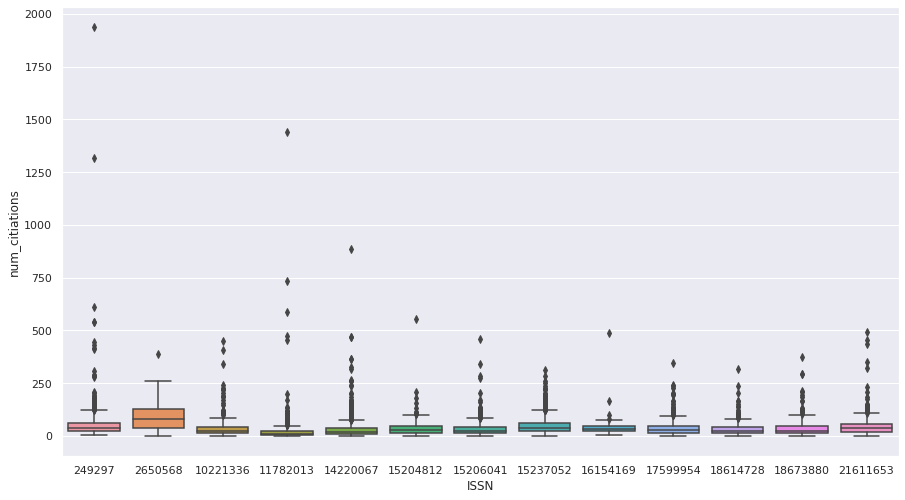

In [63]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,8.27)})
  
sns.boxplot(x = 'ISSN', y = 'num_citiations', data = train_data_12);

#Checking the correlation between data

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle

In [65]:
train_data_12

,num_citiations,ISSN,title_length,num_authors,h_index,fieldsOfStudy_num,Rank,H index,Total Docs. (2020),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country_num,Coverage_num
0,50,2650568,44,3,10,0,773,177,92,246,12696,2233,239,"8,45","138,00",0,0
1,1,2650568,17,2,31,1,773,177,92,246,12696,2233,239,"8,45","138,00",0,0
2,91,2650568,40,2,4,2,773,177,92,246,12696,2233,239,"8,45","138,00",0,0
3,131,2650568,42,4,15,2,773,177,92,246,12696,2233,239,"8,45","138,00",0,0
4,65,2650568,24,1,25,1,773,177,92,246,12696,2233,239,"8,45","138,00",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,58,18614728,103,5,28,0,3393,106,496,1512,35886,6009,1485,"4,24","72,35",0,10
7039,39,18614728,126,9,9,0,3393,106,496,1512,35886,6009,1485,"4,24","72,35",0,10
7040,73,18614728,69,7,19,0,3393,106,496,1512,35886,6009,1485,"4,24","72,35",0,10
7041,90,18614728,109,8,12,0,3393,106,496,1512,35886,6009,1485,"4,24","72,35",0,10


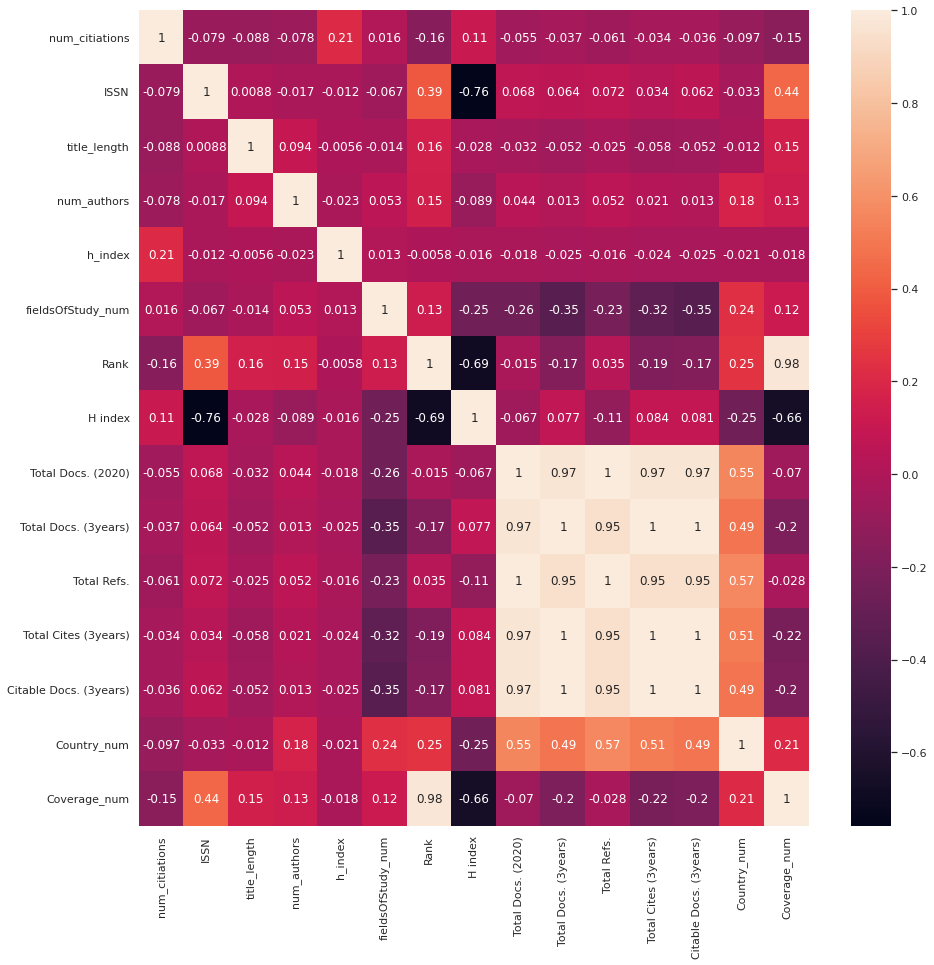

In [66]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = train_data_12.corr()

plt.figure(figsize = (15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [67]:
train_data_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   num_citiations          7043 non-null   int64 
 1   ISSN                    7043 non-null   int64 
 2   title_length            7043 non-null   int64 
 3   num_authors             7043 non-null   int64 
 4   h_index                 7043 non-null   int64 
 5   fieldsOfStudy_num       7043 non-null   int64 
 6   Rank                    7043 non-null   int64 
 7   H index                 7043 non-null   int64 
 8   Total Docs. (2020)      7043 non-null   int64 
 9   Total Docs. (3years)    7043 non-null   int64 
 10  Total Refs.             7043 non-null   int64 
 11  Total Cites (3years)    7043 non-null   int64 
 12  Citable Docs. (3years)  7043 non-null   int64 
 13  Cites / Doc. (2years)   7043 non-null   object
 14  Ref. / Doc.             7043 non-null   object
 15  Coun

##Removing highly correlated data

In [68]:
train_data_12 = train_data_12.drop(columns = ['Cites / Doc. (2years)', 'Ref. / Doc.'])

In [70]:
train_data_12['ISSN'] = [int(x) for x in train_data_12['ISSN']]

In [71]:
train_data_12 = train_data_12.drop(columns = ['Total Docs. (2020)'])

In [75]:
train_data_12 = train_data_12.drop(columns = ['Total Cites (3years)' , 'Citable Docs. (3years)'])

In [72]:
train_data_12 = train_data_12.drop(columns = ['Total Refs.'])

In [73]:
train_data_12

,num_citiations,ISSN,title_length,num_authors,h_index,fieldsOfStudy_num,Rank,H index,Total Docs. (3years),Total Cites (3years),Citable Docs. (3years),Country_num,Coverage_num
0,50,2650568,44,3,10,0,773,177,246,2233,239,0,0
1,1,2650568,17,2,31,1,773,177,246,2233,239,0,0
2,91,2650568,40,2,4,2,773,177,246,2233,239,0,0
3,131,2650568,42,4,15,2,773,177,246,2233,239,0,0
4,65,2650568,24,1,25,1,773,177,246,2233,239,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,58,18614728,103,5,28,0,3393,106,1512,6009,1485,0,10
7039,39,18614728,126,9,9,0,3393,106,1512,6009,1485,0,10
7040,73,18614728,69,7,19,0,3393,106,1512,6009,1485,0,10
7041,90,18614728,109,8,12,0,3393,106,1512,6009,1485,0,10


## According to the boxplot, the citation data consists of otliers, which should be dropped to improve regression score

In [76]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [77]:
train_data_12 = remove_outliers(train_data_12,['num_citiations'], 3)
train_data_12

Working on column: num_citiations


,num_citiations,ISSN,title_length,num_authors,h_index,fieldsOfStudy_num,Rank,H index,Total Docs. (3years),Country_num,Coverage_num
0,50,2650568,44,3,10,0,773,177,246,0,0
1,1,2650568,17,2,31,1,773,177,246,0,0
2,91,2650568,40,2,4,2,773,177,246,0,0
3,131,2650568,42,4,15,2,773,177,246,0,0
4,65,2650568,24,1,25,1,773,177,246,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7038,58,18614728,103,5,28,0,3393,106,1512,0,10
7039,39,18614728,126,9,9,0,3393,106,1512,0,10
7040,73,18614728,69,7,19,0,3393,106,1512,0,10
7041,90,18614728,109,8,12,0,3393,106,1512,0,10


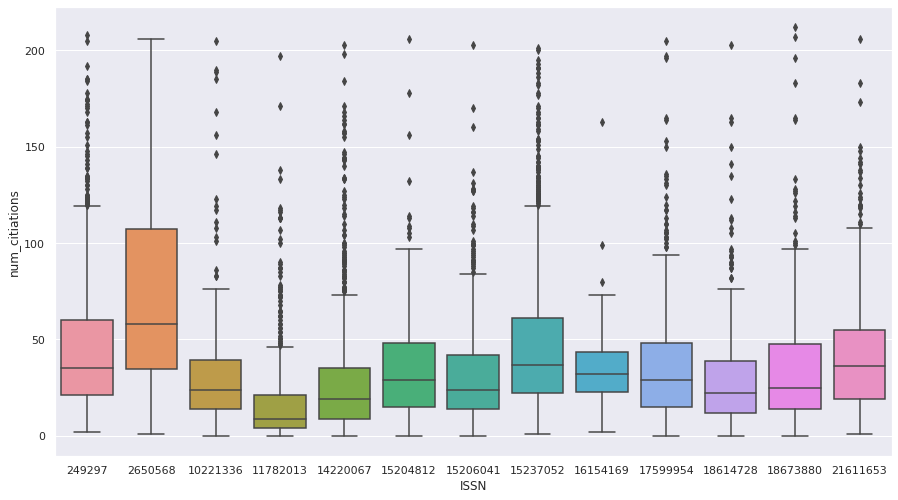

In [78]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(x = 'ISSN', y = 'num_citiations', data = train_data_12)

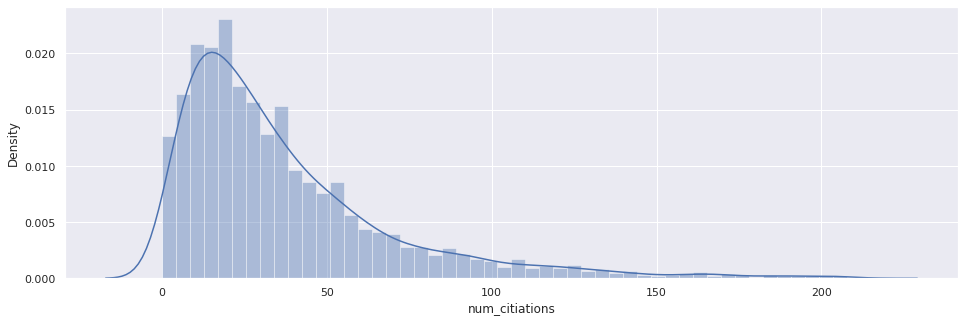

In [79]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))

sns.distplot(train_data_12['num_citiations'])

In [80]:
train_data_12['num_citiations'].describe()

count    6970.000000
mean       37.156385
std        33.414681
min         0.000000
25%        14.000000
50%        27.000000
75%        49.000000
max       212.000000
Name: num_citiations, dtype: float64

## Resulting correlation matrix of the training data

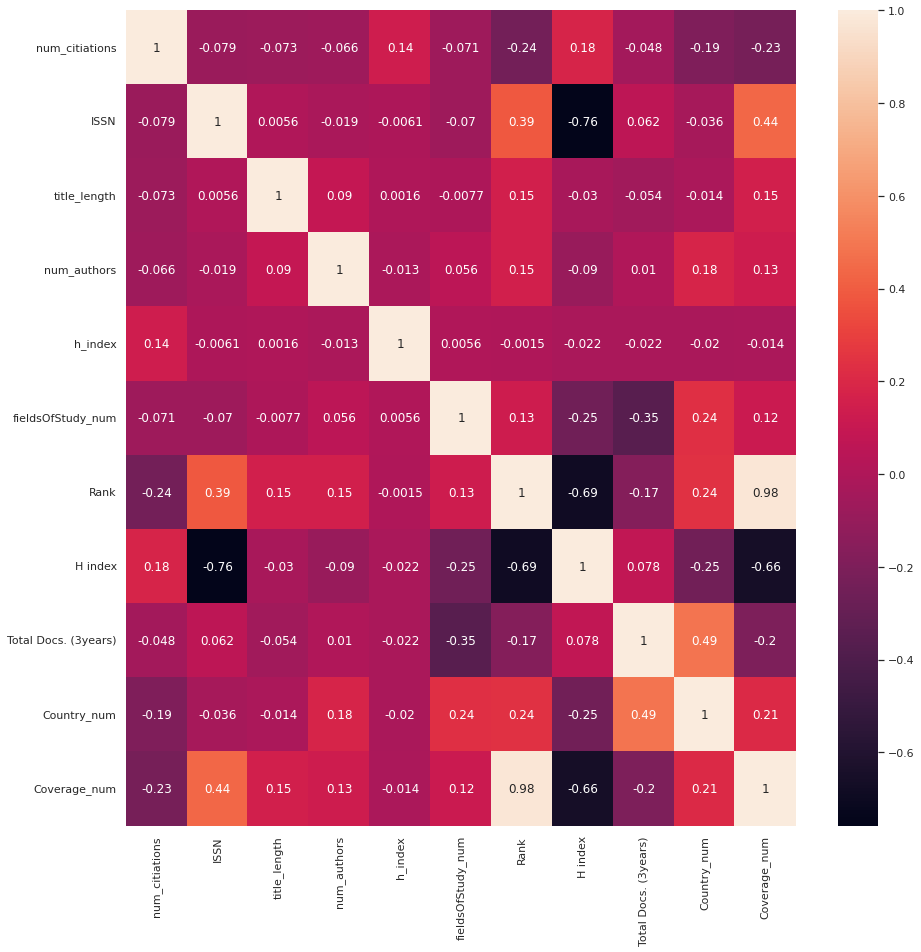

In [81]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = train_data_12.corr()

plt.figure(figsize = (15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

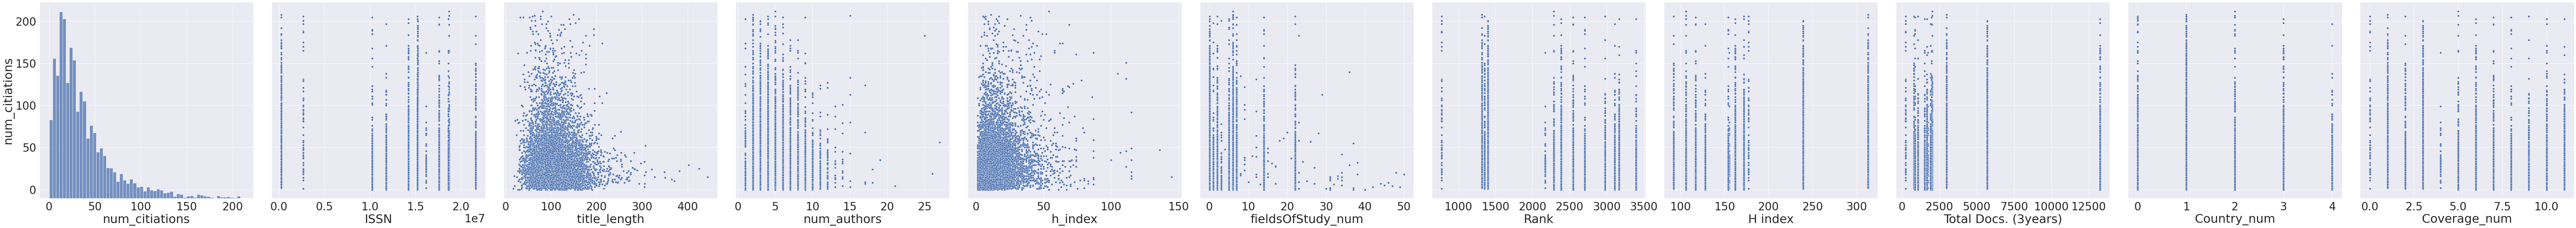

In [83]:
sns.color_palette("rocket", as_cmap=True)
sns.set(font_scale=3)
plt.figure(figsize=(10,10))
sns.pairplot(data=train_data_12,
                  y_vars=['num_citiations'],
                  x_vars=train_data_12, height=10, palette=sns.color_palette("rocket", as_cmap=True))
sns.color_palette("rocket", as_cmap=True);

#Let's split dataset for classification and regression tasks


In [86]:
total_rows = len(train_data_12)

train_data_12 = shuffle(train_data_12)
train_size = int(total_rows * 0.8)
valid_size = int(total_rows * 0.1)

df_train = train_data_12[:train_size]
df_valid = train_data_12[train_size : train_size+valid_size]
df_test = train_data_12[train_size+valid_size:]

In [87]:
y_train_regr = df_train.iloc[:,0]
y_test_regr = df_test.iloc[:,0]

y_train_regr_norm = y_train_regr/1000
y_test_regr_norm = y_test_regr/1000

y_train_regr_norm

5501    0.034
6564    0.005
816     0.073
2619    0.067
777     0.025
        ...  
3155    0.029
2446    0.026
1126    0.080
1616    0.029
959     0.028
Name: num_citiations, Length: 5576, dtype: float64

In [88]:
y_test_regr

6995    29
1518    17
6895    13
5946    13
5048    11
        ..
5823    11
1305    20
455     13
4926    40
3240    28
Name: num_citiations, Length: 697, dtype: int64

In [89]:
y_train_regr

5501    34
6564     5
816     73
2619    67
777     25
        ..
3155    29
2446    26
1126    80
1616    29
959     28
Name: num_citiations, Length: 5576, dtype: int64

In [90]:
y_test_class = df_test.iloc[:,0]

In [91]:
x_train_regr = df_train.iloc[:,:]
x_train_regr = x_train_regr.drop(columns=['num_citiations'])
x_train_regr

,ISSN,title_length,num_authors,h_index,fieldsOfStudy_num,Rank,H index,Total Docs. (3years),Country_num,Coverage_num
5501,11782013,126,3,14,22,3108,128,1919,4,10
6564,15206041,99,6,3,6,3164,172,1659,1,11
816,249297,92,6,15,6,1317,313,2971,1,1
2619,15237052,178,3,29,0,1399,239,5690,1,3
777,249297,113,4,26,6,1317,313,2971,1,1
...,...,...,...,...,...,...,...,...,...,...
3155,18673880,133,4,13,6,2285,106,2014,2,5
2446,15237052,82,5,18,0,1399,239,5690,1,3
1126,21611653,146,5,3,22,1350,92,802,1,2
1616,15237052,129,5,15,0,1399,239,5690,1,3


In [92]:
x_train_regr2 = df_train.iloc[:,:]
x_train_regr2 = x_train_regr2.drop(columns=['num_citiations', 'ISSN'])
x_train_regr2

,title_length,num_authors,h_index,fieldsOfStudy_num,Rank,H index,Total Docs. (3years),Country_num,Coverage_num
5501,126,3,14,22,3108,128,1919,4,10
6564,99,6,3,6,3164,172,1659,1,11
816,92,6,15,6,1317,313,2971,1,1
2619,178,3,29,0,1399,239,5690,1,3
777,113,4,26,6,1317,313,2971,1,1
...,...,...,...,...,...,...,...,...,...
3155,133,4,13,6,2285,106,2014,2,5
2446,82,5,18,0,1399,239,5690,1,3
1126,146,5,3,22,1350,92,802,1,2
1616,129,5,15,0,1399,239,5690,1,3


## Data normalisation

In [93]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(x_train_regr)
x_train_regr_norm = min_max_scaler.transform(x_train_regr)

x_train_regr_norm

array([[0.53986161, 0.28311688, 0.07692308, ..., 0.12856374, 1.        ,
        0.90909091],
       [0.70014487, 0.21298701, 0.19230769, ..., 0.10858372, 0.25      ,
        1.        ],
       [0.        , 0.19480519, 0.19230769, ..., 0.20940598, 0.25      ,
        0.09090909],
       ...,
       [1.        , 0.33506494, 0.15384615, ..., 0.0427265 , 0.25      ,
        0.18181818],
       [0.70159654, 0.29090909, 0.15384615, ..., 0.41835088, 0.25      ,
        0.27272727],
       [0.        , 0.16623377, 0.15384615, ..., 0.20940598, 0.25      ,
        0.09090909]])

In [94]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(x_train_regr2)
x_train_regr_norm2 = min_max_scaler.transform(x_train_regr2)

x_train_regr_norm2

array([[0.28311688, 0.07692308, 0.09027778, ..., 0.12856374, 1.        ,
        0.90909091],
       [0.21298701, 0.19230769, 0.01388889, ..., 0.10858372, 0.25      ,
        1.        ],
       [0.19480519, 0.19230769, 0.09722222, ..., 0.20940598, 0.25      ,
        0.09090909],
       ...,
       [0.33506494, 0.15384615, 0.01388889, ..., 0.0427265 , 0.25      ,
        0.18181818],
       [0.29090909, 0.15384615, 0.09722222, ..., 0.41835088, 0.25      ,
        0.27272727],
       [0.16623377, 0.15384615, 0.125     , ..., 0.20940598, 0.25      ,
        0.09090909]])

In [95]:
x_test_regr = df_test.iloc[:,:]
x_test_regr = x_test_regr.drop(columns=['num_citiations'])

min_max_scaler = MinMaxScaler().fit(x_test_regr)
x_test_regr_norm = min_max_scaler.transform(x_test_regr)

x_test_regr_norm

array([[0.85971   , 0.22418136, 0.14285714, ..., 0.09728733, 0.        ,
        0.90909091],
       [0.70159654, 0.1511335 , 0.21428571, ..., 0.41835088, 0.25      ,
        0.27272727],
       [0.85971   , 0.09571788, 0.14285714, ..., 0.09728733, 0.        ,
        0.90909091],
       ...,
       [0.        , 0.16624685, 0.21428571, ..., 0.20940598, 0.25      ,
        0.09090909],
       [0.46680427, 0.09823678, 0.21428571, ..., 0.04664566, 0.5       ,
        0.72727273],
       [0.65399013, 0.13853904, 0.35714286, ..., 1.        , 0.75      ,
        0.54545455]])

In [96]:
x_test_regr

,ISSN,title_length,num_authors,h_index,fieldsOfStudy_num,Rank,H index,Total Docs. (3years),Country_num,Coverage_num
6995,18614728,117,3,14,0,3393,106,1512,0,10
1518,15237052,88,4,5,5,1399,239,5690,1,3
6895,18614728,66,3,21,0,3393,106,1512,0,10
5946,15206041,96,9,2,6,3164,172,1659,1,11
5048,15204812,69,7,80,0,2975,172,1068,1,9
...,...,...,...,...,...,...,...,...,...,...
5823,15206041,111,4,27,6,3164,172,1659,1,11
1305,21611653,43,6,12,22,1350,92,802,1,2
455,249297,94,4,4,7,1317,313,2971,1,1
4926,10221336,67,4,16,14,2702,154,853,2,8


In [97]:
y_test_regr

6995    29
1518    17
6895    13
5946    13
5048    11
        ..
5823    11
1305    20
455     13
4926    40
3240    28
Name: num_citiations, Length: 697, dtype: int64

In [98]:
x_test_regr2 = df_test.iloc[:,:]
x_test_regr2 = x_test_regr2.drop(columns=['num_citiations', 'ISSN'])

In [99]:
min_max_scaler = MinMaxScaler().fit(x_test_regr2)
x_test_regr_norm2 = min_max_scaler.transform(x_test_regr2)

x_test_regr_norm2

array([[0.22418136, 0.14285714, 0.11403509, ..., 0.09728733, 0.        ,
        0.90909091],
       [0.1511335 , 0.21428571, 0.03508772, ..., 0.41835088, 0.25      ,
        0.27272727],
       [0.09571788, 0.14285714, 0.1754386 , ..., 0.09728733, 0.        ,
        0.90909091],
       ...,
       [0.16624685, 0.21428571, 0.02631579, ..., 0.20940598, 0.25      ,
        0.09090909],
       [0.09823678, 0.21428571, 0.13157895, ..., 0.04664566, 0.5       ,
        0.72727273],
       [0.13853904, 0.35714286, 0.14035088, ..., 1.        , 0.75      ,
        0.54545455]])

##Random Forest Classification model

In [100]:
from statistics import mean
from sklearn.ensemble import RandomForestRegressor

In [101]:
def train_and_Predict(x_train, y_train, x_test):
    regressor = RandomForestRegressor(n_estimators = 32, random_state = 0, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 60, bootstrap =  True)
    regressor.fit(x_train, y_train)

    y_predict = regressor.predict(x_test)
    return y_predict

In [102]:
y_test_regr_norm

6995    0.029
1518    0.017
6895    0.013
5946    0.013
5048    0.011
        ...  
5823    0.011
1305    0.020
455     0.013
4926    0.040
3240    0.028
Name: num_citiations, Length: 697, dtype: float64

In [103]:
x_train_regr_norm

array([[0.53986161, 0.28311688, 0.07692308, ..., 0.12856374, 1.        ,
        0.90909091],
       [0.70014487, 0.21298701, 0.19230769, ..., 0.10858372, 0.25      ,
        1.        ],
       [0.        , 0.19480519, 0.19230769, ..., 0.20940598, 0.25      ,
        0.09090909],
       ...,
       [1.        , 0.33506494, 0.15384615, ..., 0.0427265 , 0.25      ,
        0.18181818],
       [0.70159654, 0.29090909, 0.15384615, ..., 0.41835088, 0.25      ,
        0.27272727],
       [0.        , 0.16623377, 0.15384615, ..., 0.20940598, 0.25      ,
        0.09090909]])

In [104]:
y_predict_norm = train_and_Predict(x_train_regr_norm, y_train_regr_norm, x_test_regr_norm)
y_predict_norm

array([0.03130551, 0.04179647, 0.03659479, 0.02989993, 0.04820402,
       0.03363795, 0.03883311, 0.0418417 , 0.03778199, 0.03834918,
       0.05951696, 0.03831875, 0.0410901 , 0.06466652, 0.03312292,
       0.04079948, 0.02380357, 0.03489077, 0.06538906, 0.05719903,
       0.05487403, 0.03732128, 0.0272474 , 0.01218594, 0.02520599,
       0.0413593 , 0.02452662, 0.03977969, 0.05646146, 0.02583103,
       0.03089137, 0.05113036, 0.04488207, 0.01680104, 0.04100833,
       0.06756193, 0.05320476, 0.04946849, 0.04086667, 0.03623802,
       0.08088646, 0.05260141, 0.01410692, 0.07028063, 0.01150365,
       0.05012599, 0.04012478, 0.05249721, 0.04615885, 0.0205753 ,
       0.04010521, 0.06825809, 0.03631492, 0.06356146, 0.05389159,
       0.06349053, 0.02659509, 0.04238862, 0.07480104, 0.03471049,
       0.03090424, 0.03909413, 0.03826406, 0.04666302, 0.06596224,
       0.03459182, 0.03009829, 0.04674717, 0.07423741, 0.02409442,
       0.04875677, 0.03229405, 0.05092552, 0.05235268, 0.03703

In [105]:
y_test_regr_norm.reset_index(drop=True, inplace=True)

In [106]:
y_test_regr_norm[0]

0.029

In [107]:
y_test_regr_norm

0      0.029
1      0.017
2      0.013
3      0.013
4      0.011
       ...  
692    0.011
693    0.020
694    0.013
695    0.040
696    0.028
Name: num_citiations, Length: 697, dtype: float64

In [108]:
x = range(1, len(y_test_regr_norm) + 1)

In [109]:
x2 = range(0, 80)

In [110]:
max(y_test_regr)

208

In [111]:
y_test_regr

6995    29
1518    17
6895    13
5946    13
5048    11
        ..
5823    11
1305    20
455     13
4926    40
3240    28
Name: num_citiations, Length: 697, dtype: int64

In [112]:
y_predict = train_and_Predict(x_train_regr, y_train_regr, x_test_regr)
y_predict

array([ 19.5578125 ,  47.83854167,  31.09709821,  26.93638393,
        41.1608631 ,  32.88125   ,  28.54739583,  49.65915179,
        58.13526786,  37.84792907,  51.91979167,  25.54756944,
        30.10610119,  38.19702381,  41.77552083,  32.93392857,
        33.42864583,  66.16994048,  22.75182292,  67.18645833,
        33.98102679,  25.37083333,  41.05755208,  39.46681548,
        31.65379464,  28.60729167,  32.67569444,  31.7953125 ,
        52.38199405,  10.79300595,  19.3250744 ,  41.70885417,
        37.07532242,  24.6984375 ,  43.58511905,  86.08678075,
        48.38072917,  45.53125   ,  37.87723214,  28.6577381 ,
       117.29955357,  40.77983631,  39.9985119 ,  54.865625  ,
        15.90223214,  34.26979167,  52.0703869 ,  35.7624628 ,
        19.5890625 ,  32.35416667,  36.14955357,  52.46953125,
        39.40706845,  68.7703125 ,  41.33645833,  47.14732143,
        19.59630456,  54.10431548,  50.59546131,  19.49136905,
        34.77447917,  31.87447917,  41.26755952,  40.30

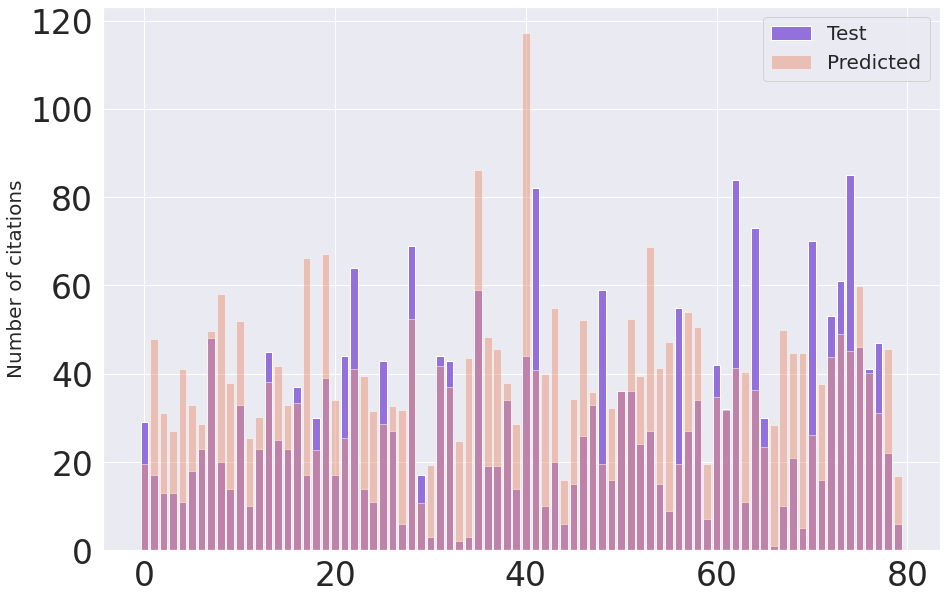

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15, 10))
plt.bar(x2, y_test_regr[:80], color = 'mediumpurple', label='Test')
plt.bar(x2, y_predict[:80], color = 'darksalmon', alpha=0.5,  label='Predicted')
plt.ylabel('Number of citations', size = 20)
plt.legend(prop={'size': 20});

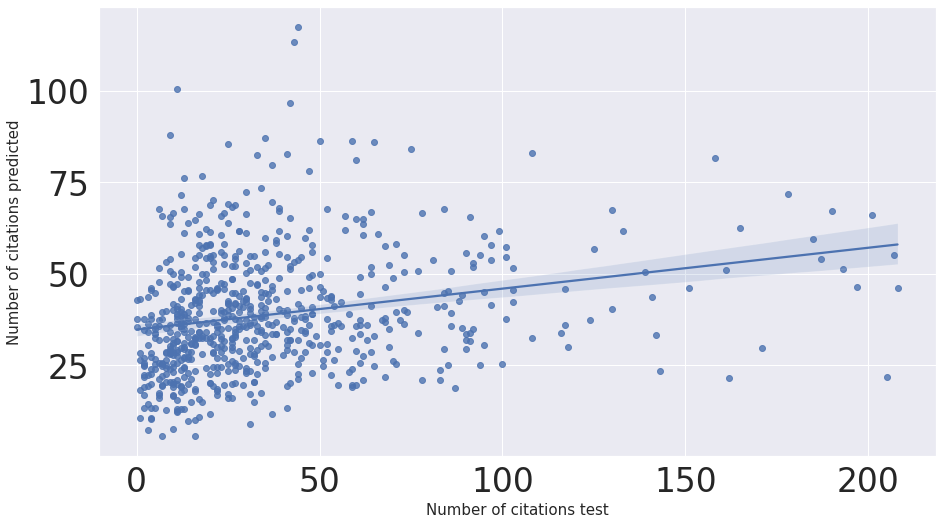

In [120]:
import seaborn as sns

sns.regplot(y_test_regr, y_predict)
plt.ylabel('Number of citations predicted', size = 15)
plt.xlabel('Number of citations test', size = 15);

In [121]:
y_predict_10yr_without_issn = train_and_Predict(x_train_regr2, y_train_regr, x_test_regr2)
y_predict_10yr_without_issn

array([ 20.79010417,  49.19791667,  30.13043155,  26.73318452,
        40.0202381 ,  30.08735119,  29.6171875 ,  51.33623512,
        58.13526786,  39.30886657,  52.01354167,  25.67256944,
        29.88110119,  38.35327381,  39.39270833,  33.30892857,
        32.95989583,  61.76994048,  22.75182292,  67.18645833,
        37.32894345,  27.85729167,  39.62526042,  46.73869048,
        32.18296131,  28.39077381,  35.63871528,  32.68385417,
        52.86220238,  10.77738095,  20.44724702,  42.6796875 ,
        35.88826885,  27.06788194,  40.86324405,  86.08678075,
        48.38072917,  44.75729167,  34.31941964,  28.98883929,
       117.42455357,  39.94650298,  37.33184524,  54.32395833,
        15.90744048,  36.28385417,  53.10833333,  35.10279018,
        18.7640625 ,  33.1875    ,  32.51339286,  51.90052083,
        40.13363095,  69.10364583,  39.74270833,  47.23534226,
        22.66192956,  53.11577381,  49.60796131,  23.77299107,
        35.4203125 ,  33.4078125 ,  41.31860119,  37.47

In [122]:
y_test_regr[:10]

6995    29
1518    17
6895    13
5946    13
5048    11
6762    18
2334    23
1503    48
1743    20
4035    14
Name: num_citiations, dtype: int64

In [123]:
y_predict_norm

array([0.03130551, 0.04179647, 0.03659479, 0.02989993, 0.04820402,
       0.03363795, 0.03883311, 0.0418417 , 0.03778199, 0.03834918,
       0.05951696, 0.03831875, 0.0410901 , 0.06466652, 0.03312292,
       0.04079948, 0.02380357, 0.03489077, 0.06538906, 0.05719903,
       0.05487403, 0.03732128, 0.0272474 , 0.01218594, 0.02520599,
       0.0413593 , 0.02452662, 0.03977969, 0.05646146, 0.02583103,
       0.03089137, 0.05113036, 0.04488207, 0.01680104, 0.04100833,
       0.06756193, 0.05320476, 0.04946849, 0.04086667, 0.03623802,
       0.08088646, 0.05260141, 0.01410692, 0.07028063, 0.01150365,
       0.05012599, 0.04012478, 0.05249721, 0.04615885, 0.0205753 ,
       0.04010521, 0.06825809, 0.03631492, 0.06356146, 0.05389159,
       0.06349053, 0.02659509, 0.04238862, 0.07480104, 0.03471049,
       0.03090424, 0.03909413, 0.03826406, 0.04666302, 0.06596224,
       0.03459182, 0.03009829, 0.04674717, 0.07423741, 0.02409442,
       0.04875677, 0.03229405, 0.05092552, 0.05235268, 0.03703

# Regression Model evaluation

In [125]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("Results for 10 year prediction for normalized data:")
print("R squared:", r2_score(y_test_regr_norm, y_predict_norm))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_regr_norm, y_predict_norm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_regr_norm, y_predict_norm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_regr_norm, y_predict_norm)))

Results for 10 year prediction for normalized data:
R squared: -0.05137333162645197
Mean Absolute Error: 0.02632313644554274
Mean Squared Error: 0.0012982674101494269
Root Mean Squared Error: 0.03603147804558435


In [126]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("Results for 10 year prediction:")
print("R squared:", r2_score(y_test_regr, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_regr, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_regr, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_regr, y_predict)))

Results for 10 year prediction:
R squared: 0.006773197686199661
Mean Absolute Error: 25.08460806440093
Mean Squared Error: 1226.466326986006
Root Mean Squared Error: 35.02094126356409


In [127]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("Results for 10 year prediction without ISSN column:")
print("R squared:", r2_score(y_test_regr, y_predict_10yr_without_issn))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_regr, y_predict_10yr_without_issn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_regr, y_predict_10yr_without_issn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_regr, y_predict_10yr_without_issn)))

Results for 10 year prediction without ISSN column:
R squared: 0.006123880631673573
Mean Absolute Error: 25.09427461648924
Mean Squared Error: 1227.2681232132713
Root Mean Squared Error: 35.03238677585744


In [128]:
y_predict_10yr_wissn_norm = train_and_Predict(x_train_regr_norm2, y_train_regr_norm, x_test_regr_norm2)
y_predict_10yr_wissn_norm

array([0.03307374, 0.04255272, 0.03335729, 0.02935662, 0.04937381,
       0.03305461, 0.03840186, 0.0428391 , 0.03753824, 0.04087984,
       0.05951696, 0.03633698, 0.04052187, 0.06466652, 0.03232917,
       0.04010417, 0.02293378, 0.03393542, 0.06294635, 0.05719903,
       0.05496257, 0.03806086, 0.02738579, 0.01204933, 0.02403099,
       0.04100253, 0.02608131, 0.03949323, 0.05646146, 0.02583103,
       0.03253043, 0.04932098, 0.04440781, 0.01713958, 0.04391068,
       0.06290828, 0.05354018, 0.04946849, 0.04125208, 0.03531875,
       0.080625  , 0.05439568, 0.01383036, 0.07028063, 0.01150365,
       0.04868589, 0.04012478, 0.05121179, 0.04478609, 0.02159063,
       0.04129219, 0.06815392, 0.03526283, 0.05851458, 0.05082128,
       0.06253741, 0.02735551, 0.04312403, 0.07480104, 0.03461153,
       0.03247403, 0.04011809, 0.03657135, 0.0455375 , 0.06454818,
       0.03681354, 0.03118646, 0.04592374, 0.07733116, 0.02352254,
       0.04904271, 0.03141458, 0.04887865, 0.05403497, 0.03726

In [129]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("Results for 10 year prediction with ISSN norm:")
print("R squared:", r2_score(y_test_regr_norm, y_predict_10yr_wissn_norm))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_regr_norm, y_predict_10yr_wissn_norm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_regr_norm, y_predict_10yr_wissn_norm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_regr_norm, y_predict_10yr_wissn_norm)))

Results for 10 year prediction with ISSN norm:
R squared: -0.04802916836554205
Mean Absolute Error: 0.026215788752908774
Mean Squared Error: 0.0012941379367784958
Root Mean Squared Error: 0.03597412871465403


#Decision Tree Regressor

In [130]:
from sklearn.tree import DecisionTreeRegressor 
  

def model_train_and_predict(X_train, y_train, X_test):

    regressor = DecisionTreeRegressor(random_state = 0) 

    # Train decision tree classifier
    regressor = regressor.fit(X_train,y_train)

    # Predicts response for test data
    y_pred = regressor.predict(X_test)
    return(y_pred)

In [132]:
y_predict_dectree = model_train_and_predict(x_train_regr_norm2, y_train_regr_norm, x_test_regr_norm2)
y_predict_dectree

array([0.057 , 0.042 , 0.02  , 0.003 , 0.047 , 0.006 , 0.04  , 0.019 ,
       0.04  , 0.073 , 0.053 , 0.108 , 0.091 , 0.022 , 0.02  , 0.037 ,
       0.029 , 0.028 , 0.059 , 0.048 , 0.062 , 0.133 , 0.007 , 0.038 ,
       0.009 , 0.156 , 0.066 , 0.036 , 0.038 , 0.003 , 0.032 , 0.062 ,
       0.114 , 0.007 , 0.05  , 0.085 , 0.032 , 0.055 , 0.049 , 0.102 ,
       0.117 , 0.078 , 0.004 , 0.122 , 0.003 , 0.065 , 0.049 , 0.046 ,
       0.052 , 0.034 , 0.043 , 0.094 , 0.041 , 0.055 , 0.094 , 0.049 ,
       0.009 , 0.038 , 0.122 , 0.    , 0.045 , 0.011 , 0.04  , 0.001 ,
       0.098 , 0.025 , 0.019 , 0.093 , 0.093 , 0.012 , 0.065 , 0.014 ,
       0.012 , 0.131 , 0.028 , 0.023 , 0.107 , 0.055 , 0.085 , 0.017 ,
       0.028 , 0.029 , 0.001 , 0.045 , 0.183 , 0.033 , 0.028 , 0.005 ,
       0.127 , 0.022 , 0.027 , 0.013 , 0.011 , 0.018 , 0.065 , 0.024 ,
       0.188 , 0.011 , 0.015 , 0.161 , 0.064 , 0.04  , 0.    , 0.061 ,
       0.031 , 0.123 , 0.113 , 0.005 , 0.019 , 0.058 , 0.024 , 0.037 ,
      

In [133]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("Results for 10 year prediction:")
print("R squared:", r2_score(y_test_regr_norm, y_predict_dectree))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_regr_norm, y_predict_dectree))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_regr_norm, y_predict_dectree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_regr_norm, y_predict_dectree)))

Results for 10 year prediction:
R squared: -1.2050600456518508
Mean Absolute Error: 0.03648063127690101
Mean Squared Error: 0.002722874461979914
Root Mean Squared Error: 0.052181169611076314


#Gradient Boosting regressor

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

def model_train_and_predict_grad(X_train, y_train, X_test):

    regressor = GradientBoostingRegressor(n_estimators=1000,criterion='mse',
                                    max_depth=8,min_samples_split=5,
                                    min_samples_leaf=5,max_features=3)

    # Train decision tree classifier
    regressor = regressor.fit(X_train,y_train)

    # Predicts response for test data
    y_pred = regressor.predict(X_test)
    return(y_pred)

In [135]:
y_predict_grad = model_train_and_predict_grad(x_train_regr_norm2, y_train_regr_norm, x_test_regr_norm2)
y_predict_grad

array([ 0.03065076,  0.05154353,  0.09658354,  0.04605508,  0.0123277 ,
        0.02093435,  0.03607898,  0.03852185,  0.0413267 ,  0.07092435,
        0.07475219,  0.02652952,  0.03080883,  0.06798652,  0.02127291,
        0.03462094,  0.03209062,  0.03090272,  0.0774794 ,  0.08191727,
        0.04952981,  0.01047183,  0.00740073,  0.01328519,  0.00619342,
        0.08433266,  0.07308781,  0.04051454,  0.03401523,  0.0532656 ,
        0.02594629,  0.0638686 ,  0.04953856, -0.00403817,  0.02290495,
        0.04320579,  0.0590371 ,  0.02322888,  0.01270268,  0.04615129,
        0.10468028,  0.06041469, -0.00680521,  0.09292859, -0.00334158,
        0.03527347,  0.04579145,  0.04918489,  0.02550901,  0.02113059,
        0.03855747,  0.05142807,  0.03524369,  0.05294754,  0.03582148,
        0.08050443,  0.0033146 ,  0.06371041,  0.08241271,  0.04453852,
        0.01445332,  0.0392797 ,  0.05018216,  0.02402656,  0.09099575,
        0.05548364,  0.01341127,  0.04715522,  0.09517397,  0.02

In [136]:
print("Results for 10 year prediction:")
print("R squared:", r2_score(y_test_regr_norm, y_predict_grad))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_regr_norm, y_predict_grad))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_regr_norm, y_predict_grad))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_regr_norm, y_predict_grad)))

Results for 10 year prediction:
R squared: -0.4361806596774238
Mean Absolute Error: 0.031223184469508936
Mean Squared Error: 0.0017734390719818724
Root Mean Squared Error: 0.04211221998401263
